In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF

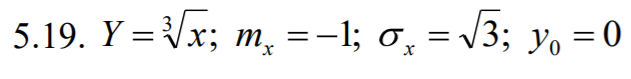

In [115]:
# b = 2, a =-4

a = -4.
b = 2.
y0 = 0
n = int(input())

10000


In [116]:
def sample(n):
    X = []
    Y = []
    # Формируем однородную непрерывную случайную величину.
    random_variable = sts.uniform()
    # Генерируем случайные числа
    xi = random_variable.rvs(size=n)
    # X_i = e_i(b - a) + a
    for i in range(n):
        x = xi[i] * (b - a) + a
        X.append(x)
        if x < 0:
            y = - (abs(x))**(1/3)
        else:
            y = x**(1/3)
        Y.append(y)
    return Y

In [117]:
Y = sample(n)
print(Y)

[-1.4032140617590472, 1.234554445166237, -0.691830771772952, -0.9832844387603895, -1.2010048925722103, -1.3080679996187357, -0.5624866007707952, -1.1095376808233848, -1.0018318953898533, -1.2954679866864705, 1.0619736581367738, -1.5148162768875986, -1.5124515501577007, 1.0581263016127336, 1.12317289897592, 1.1140860935800676, -1.4380914261931241, -0.7539285462779406, -1.583904047351232, -0.85335906652534, -1.4875094631498984, -0.5208931767926671, -1.4295968192204438, -0.7133837315621211, 1.1956217509606122, -1.1312720895360937, -1.2866672451722174, -1.5029804321957254, -0.7452348982781151, -1.1163092253811813, -1.4194476863579546, -1.4819684815591598, -1.58220439786324, -1.4655961220836533, 1.1001148255056943, -1.1553433841592162, -1.551326488703527, -1.0867952091152326, -1.5205800024688356, 0.7562356463090072, -1.4318991320727539, 1.1876727304766148, -1.4940619839164515, -1.5497533739771563, -1.1487558712524406, -1.3382851791964807, 1.078746119512538, -0.9950665842762872, -1.161237812

2) Для полученной случайной величины построить вариационный ряд, эмпирическую функцию распределения СВ Y. Результаты представить в виде таблицы и графика.

In [118]:
def empiric_func(sample):
    sample_without_repeat = sorted(list(set(sample)))
    sample_without_repeat.insert(0, -float('Inf'))
    size = len(sample)
    F_y = []
    propability = 0
    for elem in sample_without_repeat:
        propability += sample.count(elem)/size
        F_y.append(propability)
    return list(sample_without_repeat), F_y

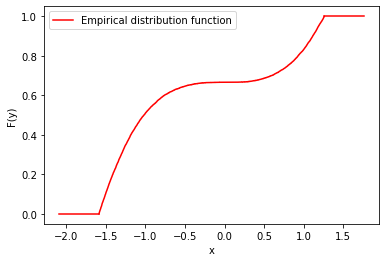

In [119]:
sorted_Y = sorted(Y)
emp_x, emp_y = empiric_func(sorted_Y)
plt.step(emp_x, emp_y, label='Empirical distribution function', color='r')
plt.plot([emp_x[1]-0.5, emp_x[1]], [0,0] ,color='r')
plt.plot([emp_x[-1], emp_x[-1]+0.5], [1,1] , color='r')
plt.xlabel('x')
plt.ylabel('F(y)')
plt.legend()

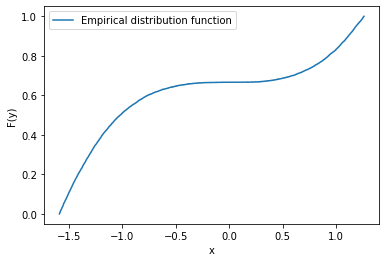

In [120]:
# проверка с использованием встроенной функции
emp_dist_func = ECDF(Y)
plt.step(emp_dist_func.x, emp_dist_func.y, label='Empirical distribution function')
plt.xlabel('x')
plt.ylabel('F(y)')
plt.legend()

In [121]:
print("Вариационный ряд:")
data = {"Значение": sorted_Y}
table = pd.DataFrame(data=data)
table.T

Вариационный ряд:


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Значение,-1.587308,-1.587281,-1.58726,-1.587186,-1.587117,-1.587052,-1.58691,-1.586807,-1.586756,-1.586729,...,1.259419,1.259434,1.259458,1.259527,1.259539,1.259561,1.259705,1.259765,1.259857,1.259897


3) Найти теоретически функцию распределения СВ $Y$. Результаты представить в аналитическом виде и в виде графика.

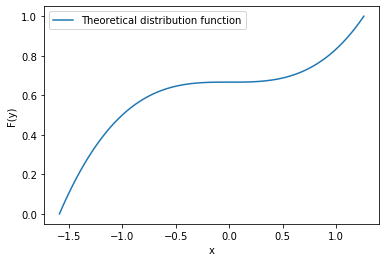

In [122]:
x_teor = np.linspace(-(4)**(1/3), 2**(1/3), 100)
y_teor = (x_teor**3 + 4) / 6
plt.plot(x_teor, y_teor, label='Theoretical distribution function')
plt.xlabel('x')
plt.ylabel('F(y)')
plt.legend()

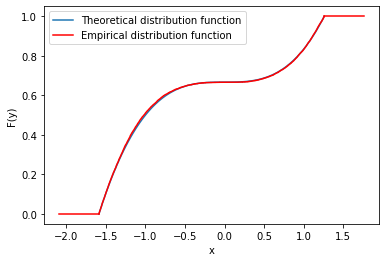

In [123]:
plt.plot(x_teor, y_teor, label='Theoretical distribution function')
plt.step(emp_x, emp_y, label='Empirical distribution function', color='r')
plt.plot([emp_x[1]-0.5, emp_x[1]], [0,0] ,color='r')
plt.plot([emp_x[-1], emp_x[-1]+0.5], [1,1] ,color='r')
plt.ylabel('F(y)')
plt.xlabel('x')
plt.legend()

Lab2

In [127]:
#определяем колво интервалов
if n <= 100:
    M = int(np.sqrt(n))
else:
    M = int(2 * np.log10(n))

Cтроим гистограмму равноинтервальным методом c помощью функции matplotlib.pyplot.hist()

In [128]:
def amount_in_gap(start_point, end_point, sample, delta_i):
    n = 0
    if start_point == sample[0]:
        n += sample.count(start_point)
    for elem in sample:
        if elem > start_point and elem < end_point:
            n += 1
        else:
            if elem == end_point:
                n += 1
    return n/(len(sample)*delta_i)

def gistogram(start_point, end_point, sample):
    n = 0
    if start_point == sample[0]:
        n += sample.count(start_point)
    for elem in sample:
        if elem > start_point and elem < end_point:
            n += 1
        else:
            if elem == end_point:
                n += 1
    return n/(len(sample))

def equal_interval(sample):
    sample.sort()
    A = np.zeros(M)
    B = np.zeros(M)
    v_i = np.zeros(M)
    gist = np.zeros(M)
    delta_i = (sample[-1]-sample[0])/M
    for i in range(M):
        A[i] = sample[0] + i * delta_i
        B[i] = sample[0] + (i + 1) * delta_i
        v_i[i] = amount_in_gap(A[i], B[i], sample, delta_i)
        gist[i] = gistogram(A[i], B[i], sample)
    return A, B, v_i, gist

Гистограмма равноинтервальным методом:


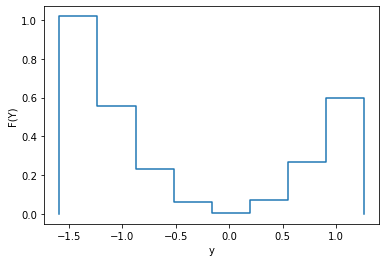

In [130]:
A, B, v_i, gist = equal_interval(Y)
x, y = [], []
x.append(A[0])
y.append(0)
for key, item in enumerate(A):
    x.append(A[key])
    x.append(B[key])
    y.append(v_i[key])
    y.append(v_i[key])
x.append(B[-1])
y.append(0)
plt.plot(x, y, label='F*(x)')
print("Гистограмма равноинтервальным методом:")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

Строим полигон распределения:

Гистограмма равноинтервальным методом:


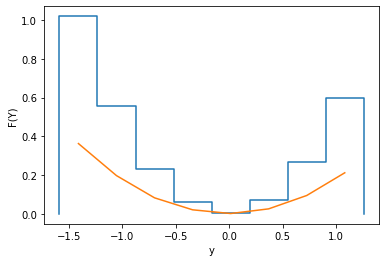

In [131]:
plt.plot(x, y, label='F*(x)')
m = A[1] - A[0]
plt.plot(A + m / 2, gist) 
print("Гистограмма равноинтервальным методом:")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

Эмпирическая функция распределения по сгруппированным данным

In [132]:
norm_prob = v_i * (A[1] - A[0])
empiric_distrib_func = []
sum = 0.
for i in norm_prob:
    empiric_distrib_func.append(sum)
    sum += i
empiric_distrib_func.append(1)
print("Эмпирическая функция распределения:")
print(empiric_distrib_func)

Эмпирическая функция распределения:
[0.0, 0.36289999999999994, 0.5604999999999999, 0.6434999999999998, 0.6646999999999998, 0.6666999999999998, 0.6927999999999999, 0.7877999999999998, 1]


График эмпирической функции распределения:


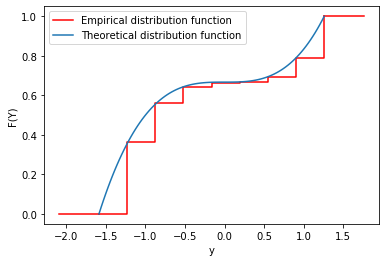

In [133]:
intervals = [A[0]]
for i in B:
    intervals.append(i)
    intervals.append(i)
intervals.append(float("Inf"))
F_grafic = []
for elem in empiric_distrib_func:
    F_grafic.append(elem)
    F_grafic.append(elem)
plt.plot(intervals, F_grafic, label='Empirical distribution function', color = 'r')
plt.plot([intervals[0]-0.5, intervals[0]], [0,0] ,color='r')
plt.plot([B[-1], B[-1]+0.5], [1,1] ,color='r')
plt.plot(x_teor, y_teor, label='Theoretical distribution function')
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.legend()
print("График эмпирической функции распределения:")
plt.show()

In [134]:
interval = list(A)
interval.append(B[-1])
table = pd.DataFrame(data={"Y": interval, "F(Y)": empiric_distrib_func})
table.T

,0,1,2,3,4,5,6,7,8
Y,-1.587308,-1.231408,-0.875507,-0.519606,-0.163706,0.192195,0.548096,0.903996,1.259897
F(Y),0.000000,0.362900,0.560500,0.643500,0.664700,0.666700,0.692800,0.787800,1.000000


Найдем теоретическую плотность распределения:

In [135]:
f_y = []
for xi in x_teor:
    f_y.append(1/2*xi**2) # теоретическая плотность распределения

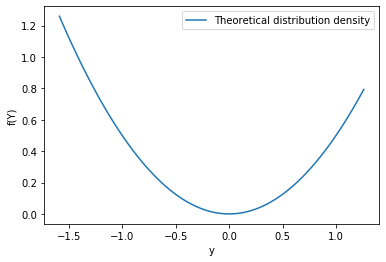

In [136]:
plt.plot(x_teor, f_y, label='Theoretical distribution density')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.legend()
plt.show()

Сравним найденные теоретическую и эмпирическую плотности распределения:

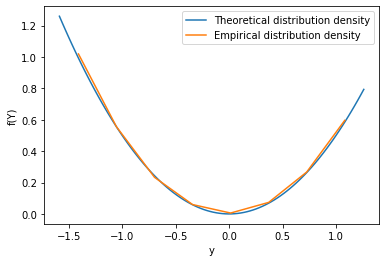

In [137]:
plt.plot(x_teor, f_y, label='Theoretical distribution density')
# Эмпирическая плотность распределения
m = A[1] - A[0]
plt.plot(A + m / 2,  v_i, label='Empirical distribution density')
plt.legend()
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

Построить гистограмму равновероятностным методом

In [150]:
while(True):
    if (n - (n // M) * M) <= 5:
        m = n // M
        break
    else:
        M += 1
        
print(m)

1250


In [139]:
def equal_probability(sample):
    sample.sort()
    A = np.zeros(M)
    B = np.zeros(M)
    
    A[0] = sample[0]
    B[-1] = sample[-1]
    for i in range(1, M):
        A[i] = (sample[m * i] + sample[m * i + 1]) / 2
        B[i - 1] = A[i]
    delta = []
    for i in range(len(A)):
        delta.append(B[i] - A[i])
    f_x = []
    x = []
    s = A[0]
 
    for i in delta:
        f_x.append(1. /(M * i))
        x.append(s)
        s += i
    return (x, f_x)

In [140]:
x, y = equal_probability(Y)

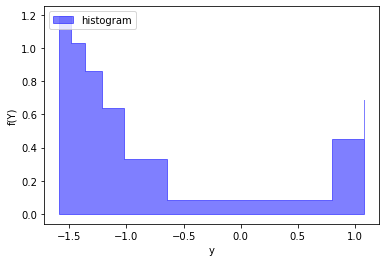

,0,1,2,3,4,5,6,7
x0,-1.587308,-1.482333,-1.360949,-1.215650,-1.019123,-0.643717,0.800339,1.077854
normed m,1.190759,1.029790,0.860295,0.636046,0.332972,0.086562,0.450426,0.686651


In [141]:
plt.fill_between(x, y1=y, y2=[0]*len(y), color='b', step='post', alpha=0.5, label="histogram")
nx = []
for i in range(len(x) - 1):
    nx.append((x[i] + x[i+1]) / 2)
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

table2 = pd.DataFrame(data={"x0" : x, "normed m": y})
table2.T

Эмпирическая функция распределения по сгруппированным данным

In [142]:
empiric_distrib_func = []
sum = 0.
v = 1 / M
for i in range(len(y)):
    empiric_distrib_func.append(sum)
    sum += v
empiric_distrib_func.append(sum)
print(empiric_distrib_func)

[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]


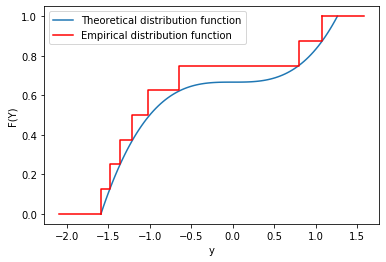

In [143]:
plt.plot(x_teor, y_teor, label='Theoretical distribution function')
x_interval = []
x_interval.append(-float("Inf"))
for xi in x:
    x_interval.append(xi)
    x_interval.append(xi)
x_interval.append(float("Inf"))
F_y = []
for F_i in empiric_distrib_func:
    F_y.append(F_i)
    F_y.append(F_i)
plt.plot(x_interval, F_y, label='Empirical distribution function', color = 'r')
plt.plot([x[0]-0.5, x[0]], [0,0] ,color='r')
plt.plot([x[-1], x[-1]+0.5], [1,1] ,color='r')
plt.legend()
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

Сравним найденные теоретическую и эмпирическую плотности распределения:

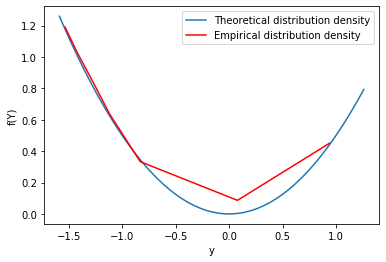

In [144]:
plt.plot(x_teor, f_y, label='Theoretical distribution density')
plt.plot(nx, y[:-1], color='r', label='Empirical distribution density')
plt.legend()
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()